# Core task 2 : code to get you started

This notebook demonstrates how to use the network_spreading_models toolbox to fit the NDM and FKPP models to some target data.
First, we import the relevant libraries.

If you have set up the environment correctly, the following cell should run without any errors.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from nsm_toolbox.src import network_diffusion_model, FKPP_model
from nsm_toolbox.src.find_optimal_timepoint import find_optimal_timepoint

from nsm_toolbox.src.ModelSelection import ModelSelection

Next, we will load in the target data, which is regional tau-PET SUVR data from the ADNI dataset, averaged across individuals with amyloid and tau pathology.

We min-max normalise the data to the range [0,1], as this is required for the model fitting.

In [ ]:
# load in target data
tau = pd.read_csv("data/PET/tau_ab+_tau+.csv", names=["region", "suvr"], header=0)
target_data = tau["suvr"].values

# remove the subcortical regions, since these are affected by off-target binding of the tau-PET tracer
CORT_IDX = np.concatenate([np.arange(34), np.arange(49, 83)])
target_data = target_data[CORT_IDX]

def normalise_data(data):
    ''' min-max normalise the data '''
    return (data - np.min(data)) / (np.max(data) - np.min(data))

target_data = normalise_data(target_data)

# load in the reference list
region_list = pd.read_csv( "data/TauRegionList.csv")["Raj_label"].tolist()

Now we are ready to fit the models to the data.

We will start with the Network Diffusion Model. For now, we will use one of the connectomes from a single cognitively normal individual.

In [5]:
# the path where the connectome is stored
connectome_path = "data/connectomes/CN/CN_0.csv"

# define the timepoints for our model evaluation
t = np.arange(0, 50, 0.1)

# define gamma: the diffusion constant (we set this to 1 since we are not calibrating our time units to any real-world time)
gamma = 1

# set up our network diffusion model class with the connectome, timepoints, gamma, and reference list
ndm = network_diffusion_model.NDM(connectome_fname=connectome_path,
                                  t=t,
                                  gamma = gamma,
                                  ref_list=region_list)

# find the optimal seed region for our dataset
df, optimal_seed = ndm.optimise_seed_region(target_data)
print(optimal_seed)

# run the model with the optimal parameters (in this case, the seed region) and record model fit
ndm.seed_region = optimal_seed["seed"]
model_output = ndm.run_NDM()

# we use find_optimal_timepoint to scan the model output and find the timepoint that best fits the target data
min_idx, prediction, SSE = find_optimal_timepoint(model_output, target_data)

{'seed': 'Temporalpole'}


## Model comparison
Dummy example for 5 models each having 100 obeservations using AICc criterion: 

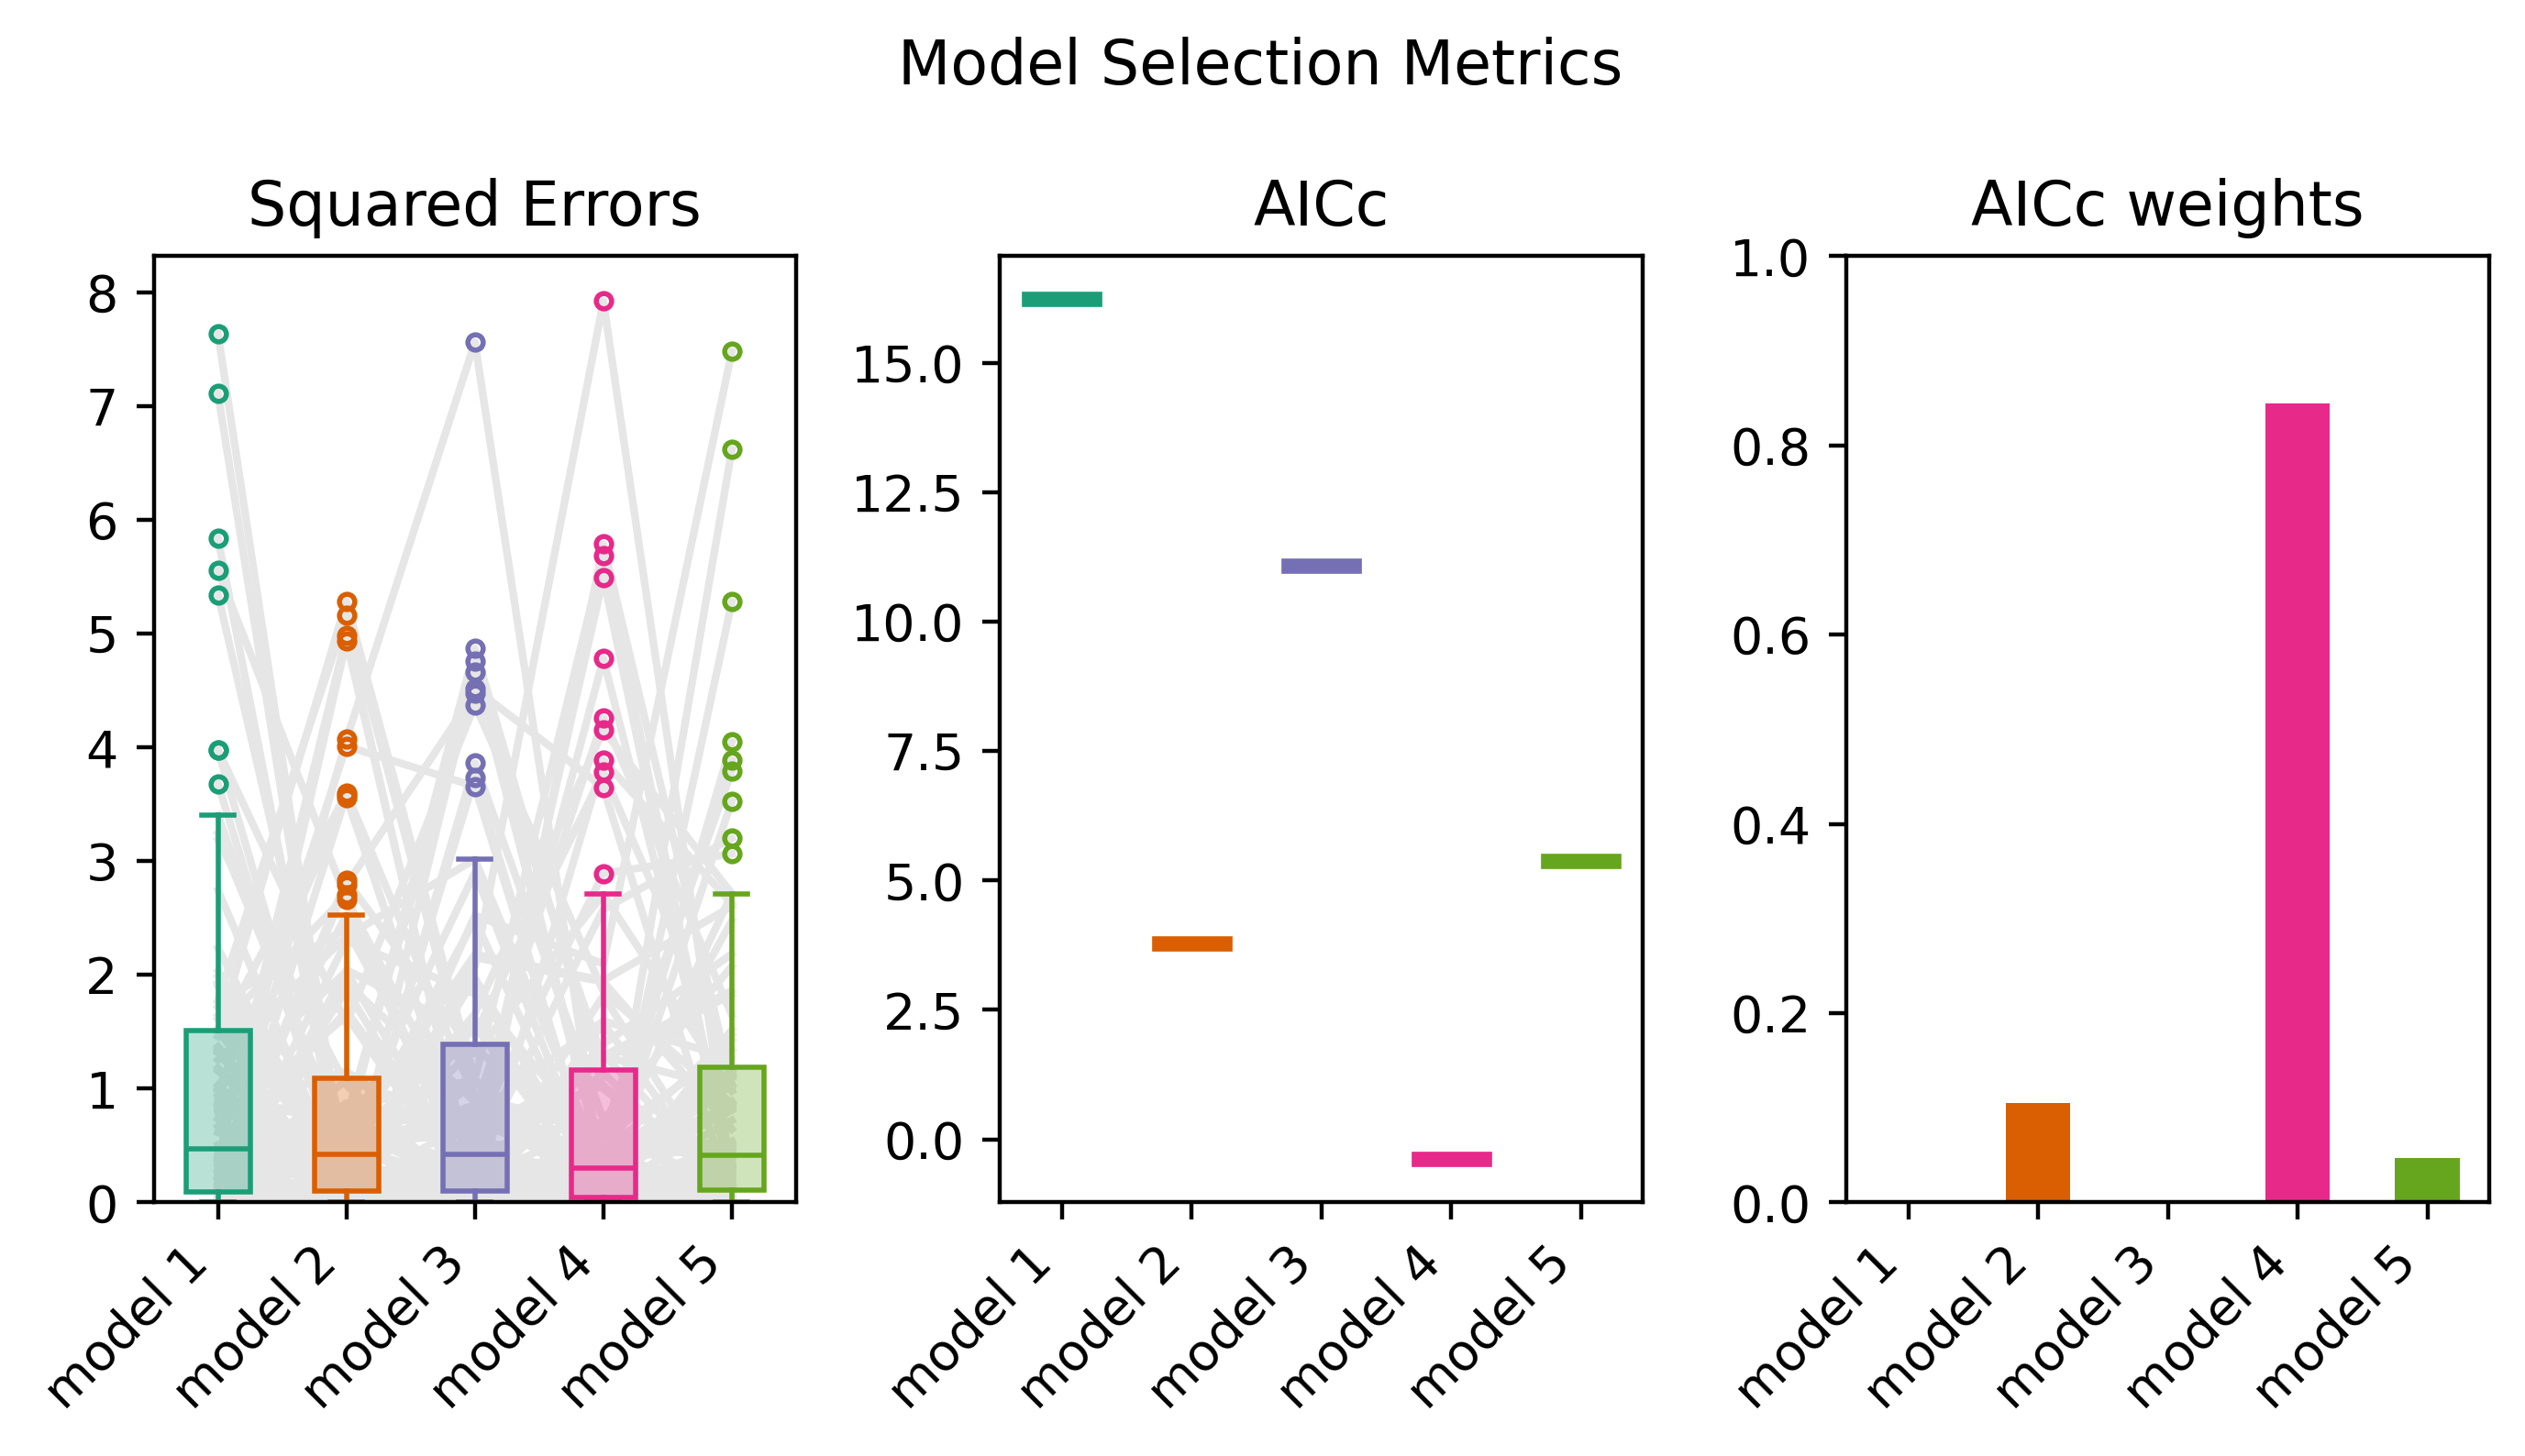

     Model       AICc  AICc weights  rank
0  model 1  16.231493      0.000208     5
1  model 2   3.778617      0.105138     2
2  model 3  11.073041      0.002740     4
3  model 4  -0.388465      0.844558     1
4  model 5   5.373750      0.047357     3


In [4]:
from nsm_toolbox.src.ModelSelection import ModelSelection

residuals = np.random.normal(size=(100,5))
results = ModelSelection([3,3,4,2,3], 'AICc')(residuals)
print(results)